# Simulating Projectile motion

We first import `numpy` to work with vectors in Python conveniently 

In [ ]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

%matplotlib inline

### Input

This is the part of our code were we set the _input parameters_ for our simulation.
- we need the initial position $r_0$ and velocity $v_0$
- we need to set the gravitational field strenght $g$
- we need to set the time step $\Delta t$

In [ ]:
# Input

# initial position and velocity of the point particle
pos_init = np.array([0, 0])
vel_init = np.array([10, 35])

# Set g
g = np.array([0, -9.81])

Now we determine the time step $\Delta t$. For that we take the number of time steps $N$ as well as the final time $t_{final}$ as the input and calculate
$$
    \Delta t = \frac{t_{final}}{N}
$$

In [14]:
# Set the number N of time steps 
N = 10000
# Set a final time 
t_final = 8

dt = t_final/N

### Main

The main part of our code is the implementation of the _**Euler method**_. 
- In our fist implementation we simply run through a `for` loop for $N$ number of time steps. 
- In each run we update the postion vector implemented by `pos` and velocity vector implemented as `vel` via the *Euler method*:
$$
    \begin{align*}
        r(t+\Delta t) &\approx r(t) + v(t)\Delta t \\
        v(t+\Delta t) &\approx v(t) + g\Delta t
    \end{align*}
$$
- as we are not saving the positions and velocities at each time step we can simply update the `pos` and `vel` vectors directly. At the moment there is no need to keep track of time. 

In [15]:
np.zeros((10,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [58]:
def accel(vel):
    return g - 0.1*vel#*np.linalg.norm(vel)

# Implementing the Euler method
pos = pos_init
vel = vel_init
data = np.zeros((N,2))
data[0] = pos

for i in range(N): 
    pos = pos + vel*dt
    vel = vel + accel(vel)*dt
    data[i]= pos


The vectors `pos` and `vel` contain now the approximations to $r(t_{final})$ and $v(t_{final})$ we have calculated with the _Euler method_. 

### Output

We wish to keep our fist implementation very basic for now. This is why we simply print out the final values obtained by the _Euler method_. We shall implement graphical outputs in the future.

In [59]:
int(np.ceil(N/100))

100

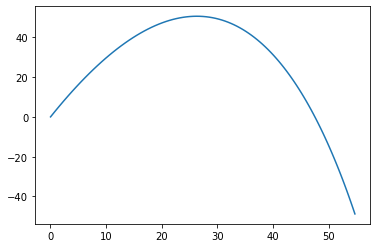

In [60]:
# Output
# x, y = zip(*data)
Step = int(np.ceil(N/100))
plt.plot(data[:N+1:Step,0],data[:N+1:Step,1])
plt.show()


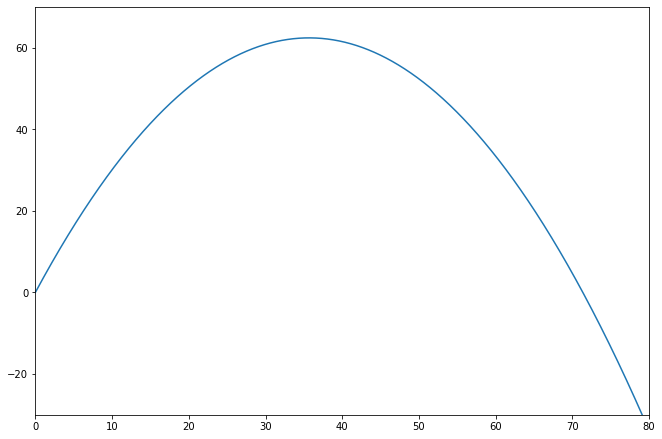

In [49]:
# Animation

fig, ax = plt.subplots(figsize=(11,7.5))

ax.set_xlim(( 0, 80))
ax.set_ylim((-30, 70))

line, = ax.plot([], [])
fps = 25

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    idx = int(i)
    line.set_data(data[:idx,0], data[:idx,1])
    return (line,)

anim = animation.FuncAnimation(fig, animate, # init_func=init,
                               frames = np.arange(0, N, N/(t_final*fps)), 
                               interval = 1000//fps, 
                               blit = True)

HTML(anim.to_html5_video())
# HTML(anim.to_jshtml())


### Evaluation

The main reason why we have picked the well-known _projectile motion_ for our first simulation is because we can use the _SUVAT_ equations to calculate the final position and velocity.
$$
    v(t_{final}) = v_0 + g\,t_{final}
$$

In [50]:
# Check velocity using SUVAT
print(vel_init + g*t_final)


[ 10.   -43.48]


We can see that the final velocity obtained by the _Euler method_ fully agrees with the one we have obtained from _SUVAT_.

**Q:** _**Why is that**_?

This is because the velocity grows linearly (affine) with time in this case. Since $t_{final} = N\,\Delta t$ we have
$$
    \sum_{j=1}^N g\,\Delta t = N\,g\,\Delta t = g\, t_{final}
$$
In other words, adding the vector $g\,\Delta t$ every single iteration of the `for` loop (i.e. $N$ times) or multiplying the vector $g$ with the final time $t_{final}$ yields the same result.

We calculate the final psoition $r(t_{final})$ using _SUVAT_:
$$
  r(t_{final}) = r_0 + v_0\, t_{final} + \frac{1}{2}g\, t_{final}^2
$$

In [51]:
# Check position using SUVAT
print(pos_init + vel_init * t_final + 1/2 * g * t_final**2)

data_calc = [pos_init + vel_init * (k*dt) + 1/2 * g * (k*dt)**2 for k in range(N+1)]
x_calc, y_calc = zip(*data_calc)
plt.plot(x,y, label = 'Euler')
plt.plot(x_calc,y_calc,'r', label = 'Analytic')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.legend()
plt.show()

[ 80.   -33.92]


NameError: name 'x' is not defined

With $N =10\,000$ steps and a final time $t_{final}=4$ the calculated final position and the numerically obtained final postion agree in the first $3$ decimal places. Although this seems satisfactory we have to be aware that a time of $4\,s$ is not long and $10\,000$ step is a very small time step of $0.4\,ms$. Moreover, if we increase the final time $t_{final}$ the error grows, making long term predictions unreliable. 

We can find the exact difference between the calculated and nuemrically obtained value:

In [ ]:
print(pos_init + vel_init * t_final + 1/2 * g * t_final**2 - pos)

time = [k*dt for k in range(N+1)]

x_diff = np.array(x)-np.array(x_calc)
y_diff = np.array(y)-np.array(y_calc)

fig, ax = plt.subplots(1,2,figsize=(20,5))

ax[0].set_ylabel('$\Delta x$', fontsize = 14)
ax[0].set_xlabel('time', fontsize = 14)
ax[1].set_ylabel('$\Delta y$',  fontsize = 14)
ax[1].set_xlabel('time', fontsize = 14)


ax[0].plot(time,x_diff)
ax[1].plot(time,y_diff)
plt.show()

The _Euler method_ works, but is not terribly efficient and hene requiers quite a lot of computation time to get reliable results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

def Gen_RandLine(length, dims=2) :
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length) :
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index-1] + step

    return lineData

def update_lines(num, dataLines, lines) :
    for line, data in zip(lines, dataLines) :
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2,:num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                              interval=50, blit=False)

plt.show()

In [ ]:
HTML(line_ani.to_jshtml())

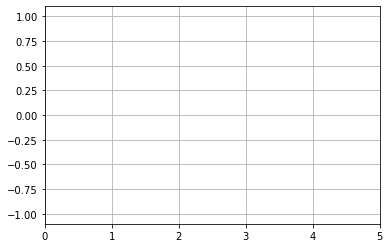

In [40]:
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)
data_gen.t = 0

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(0, 5)
ax.grid()
xdata, ydata = [], []
def run(data):
    # update the data
    t,y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10,
    repeat=False)
plt.show()
HTML(ani.to_jshtml())